# 1- Naive Bayes for binary class classification.

In [ ]:
# Required libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedStratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt
import math

##1-b-EDA

In [ ]:
# Reading data
wineDF = pd.read_csv(r'/content/wine.csv')
wineDF.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad


In [ ]:
wineDF.shape

(1599, 12)

In [ ]:
# Data type for each features
wineDF.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                  object
dtype: object

In [ ]:
# Data fill rate for each features
wineDF.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
# chk if data imbalance is there
wineDF.quality.value_counts()

good    855
bad     744
Name: quality, dtype: int64

In [ ]:
# seprating dependent and independent/target feature
X = wineDF.iloc[:, :-1]
y = wineDF.iloc[:, -1]

In [ ]:
# standarising X
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)
X = pd.DataFrame(scaled_data)
print("Data after Standardization ")
X.head(3)

Data after Standardization 


,0,1,2,3,4,5,6,7,8,9,10
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777


In [ ]:
# Correlation matrix
corr_matrix = X.corr(method='pearson')

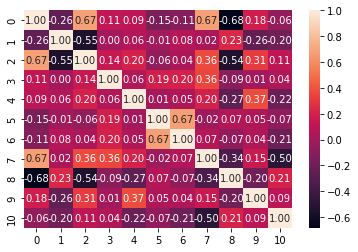

In [ ]:
sn.heatmap(corr_matrix, annot=True,fmt='.2f')
plt.show()

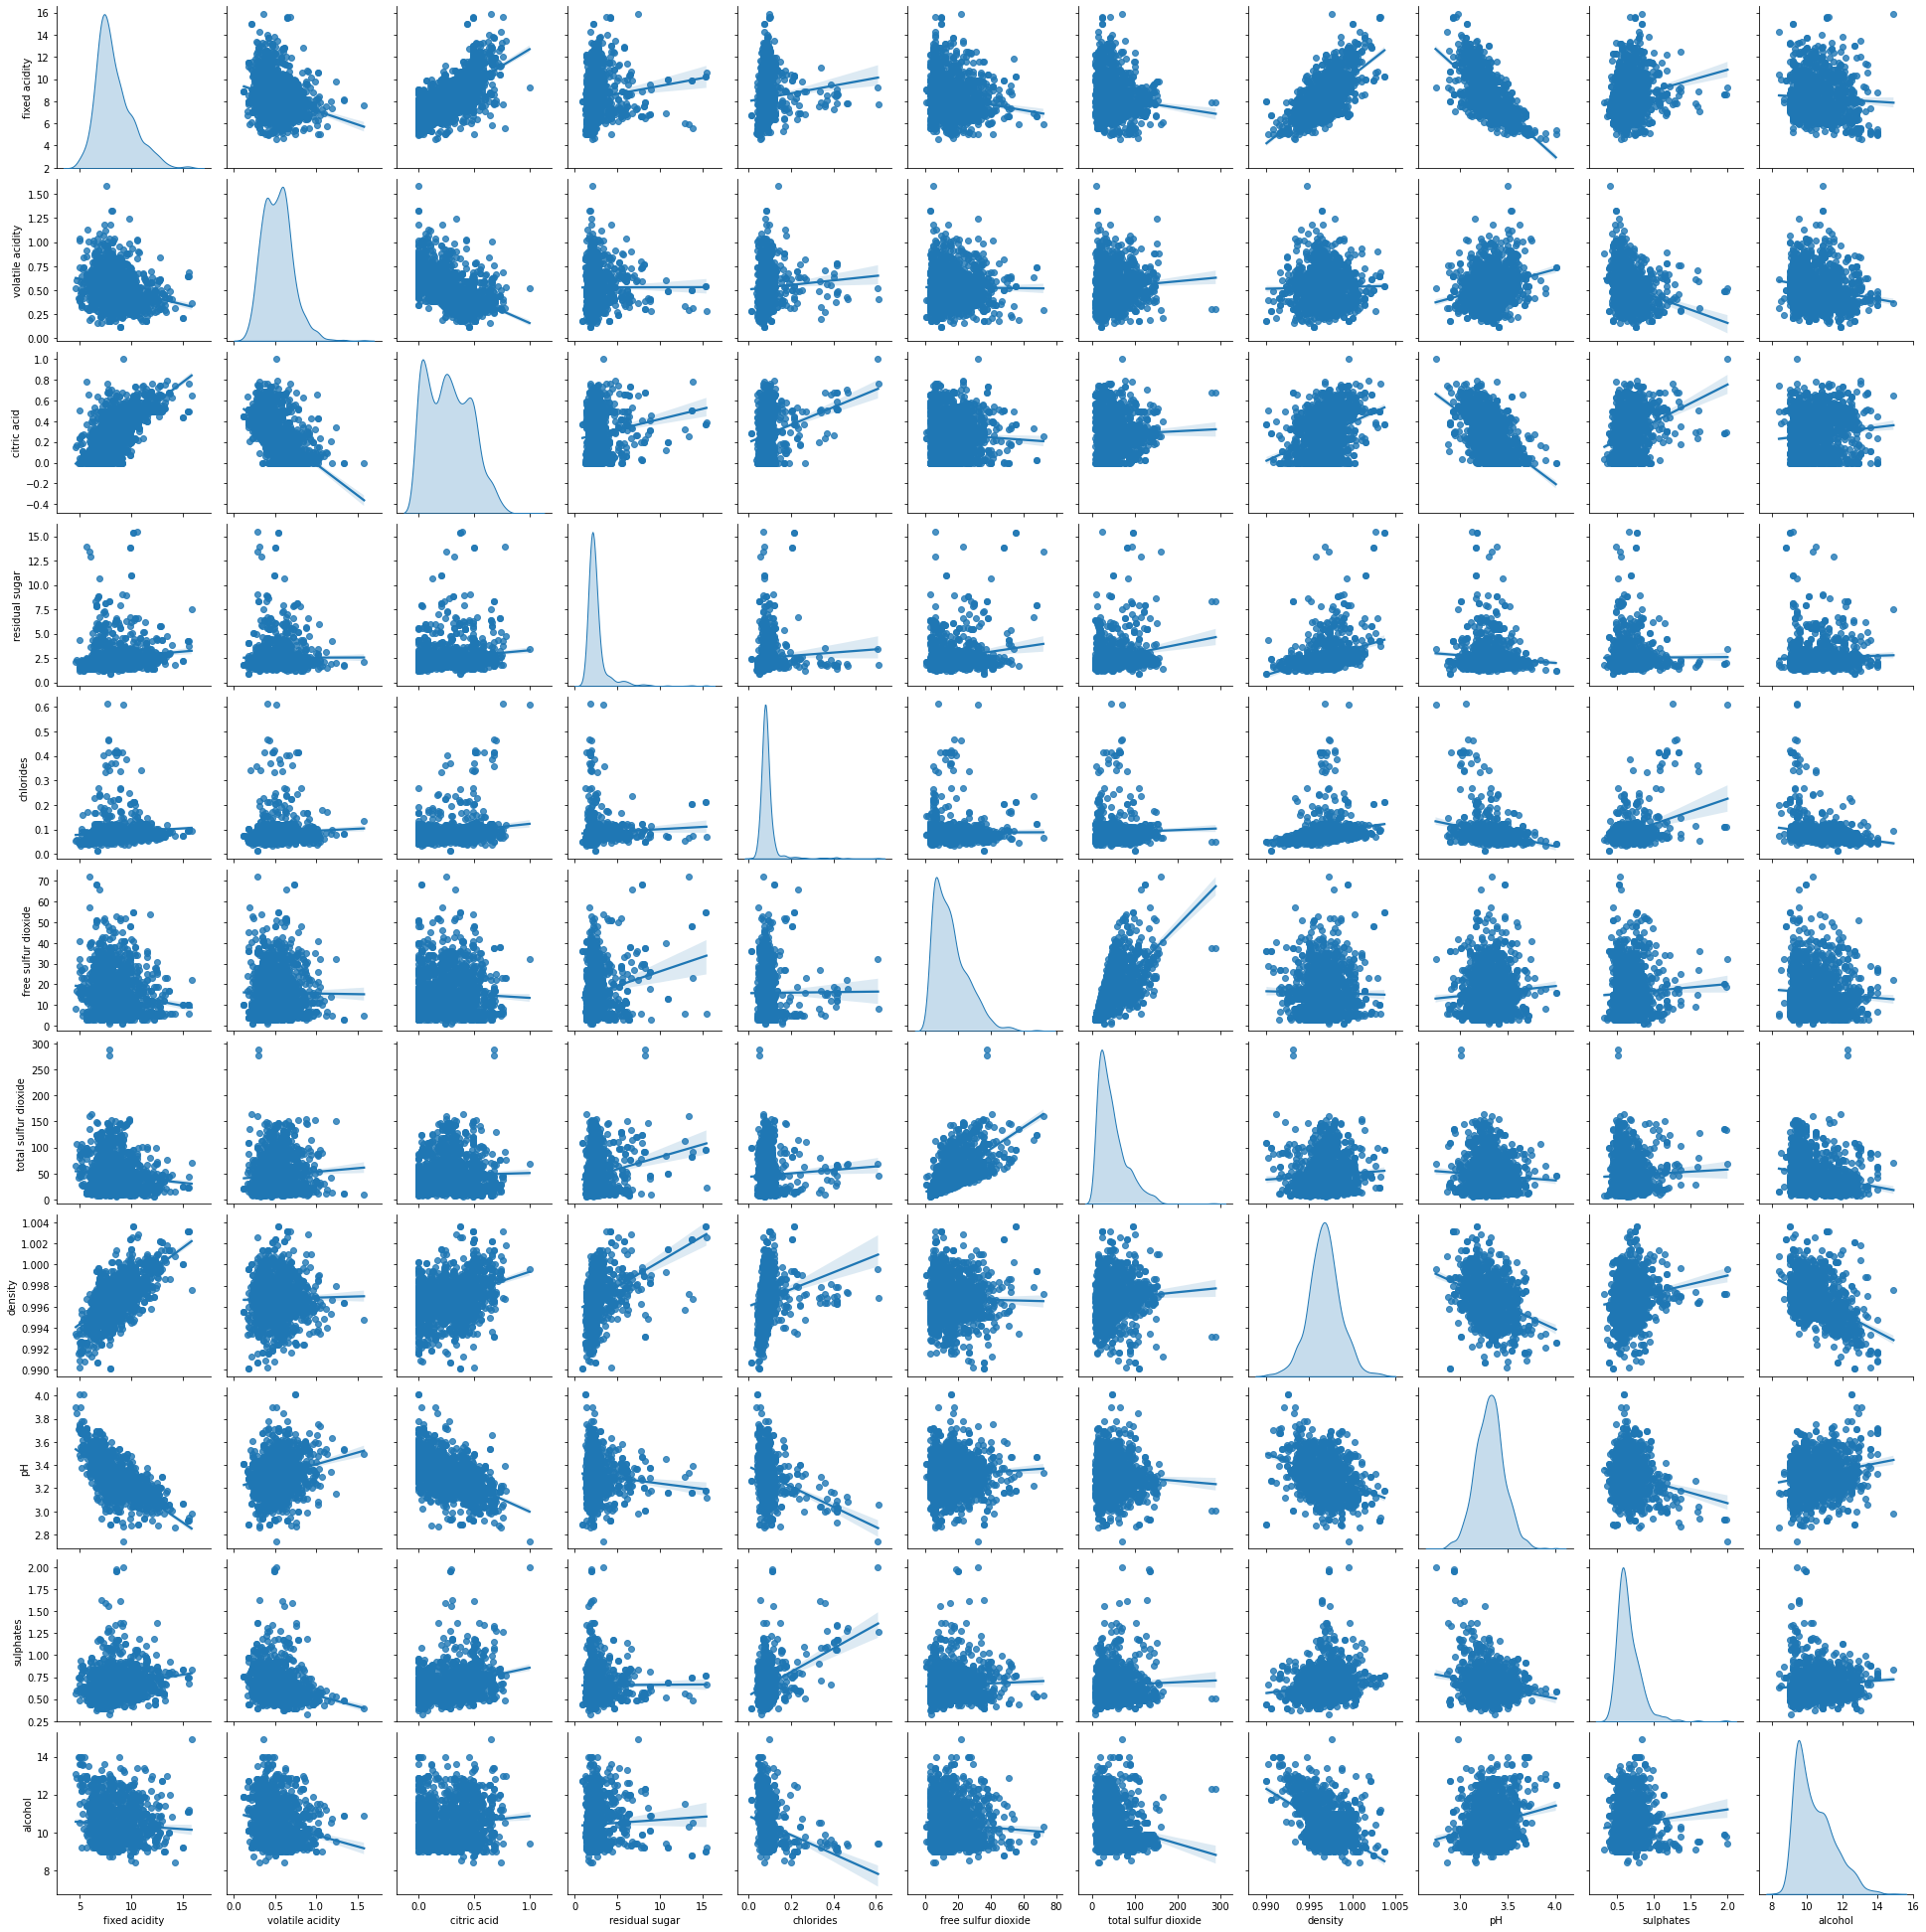

In [ ]:
sn.pairplot(wineDF,diag_kind='kde',kind='reg')

From Above corr matrix and pair plot, we can see that some of the features are around 70% correlated, we can drop them, but as we can also see that, none of the features are highly correlated, not more than 70 %. Thus this can be ignored too. 
Since for Naive Baise, we have the assumption of features being independent and normally distributed. Thus this assumption will hit us back with poor accuracy.

---



## 1-c Defining Classifer with Grid Search CV

In [ ]:
# Train/Test data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=77, stratify=y)

In [ ]:
# Instanciating classifier and training
NB = GaussianNB()

Gaussian Naive Bayes assumes that features follows normal distribution which is most unlikely in real world.So solve this problem we can perform "power transformation" on each feature to make it more or less normally distributed. By default, PowerTransformer results in features that have a 0 mean and 1 standard deviation.

In [ ]:
# Cross validation
cv_method = RepeatedStratifiedKFold(n_splits=10, 
                                    n_repeats=3, 
                                    random_state=78)

In [ ]:
# hyperParameter 
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

# Grid search CV
gs_NB = GridSearchCV(estimator=NB, 
                     param_grid=params_NB, 
                     cv=cv_method,
                     verbose=1,
                     n_jobs=1, 
                     scoring='accuracy', return_train_score= True)

# PowerTransformer - for normal distribution
DataTrain_transformed = PowerTransformer().fit_transform(X_train)
DataTest_transformed = PowerTransformer().fit_transform(X_test)

# Training
gs_NB.fit(DataTrain_transformed, y_train)

Fitting 30 folds for each of 100 candidates, totalling 3000 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=78),
             estimator=GaussianNB(), n_jobs=1,
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933...
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             return_train_score=True, scoring='accuracy', verbose=1)

In [ ]:
print("BEST var_smoothing: ",gs_NB.best_params_['var_smoothing']," BEST SCORE: ",gs_NB.best_score_)

BEST var_smoothing:  0.006579332246575682  BEST SCORE:  0.7363524238524238


In [ ]:
results = pd.DataFrame.from_dict(gs_NB.cv_results_)
# results = results.sort_values(['params'])
train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']
K =  results['params']
log_k =map(lambda x: math.log(x['var_smoothing']), K)
log_k = list(log_k)

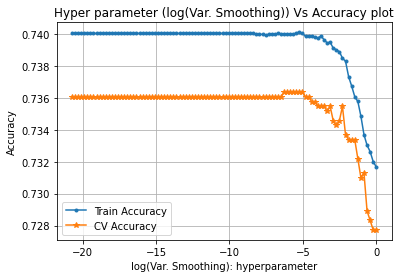

In [ ]:
plt.plot(log_k, train_auc, marker = '.',label='Train Accuracy')    
plt.plot(log_k, cv_auc, label='CV Accuracy', marker = '*')

plt.legend()
plt.xlabel("log(Var. Smoothing): hyperparameter")
plt.ylabel("Accuracy")
plt.title("Hyper parameter (log(Var. Smoothing)) Vs Accuracy plot")
plt.grid()
plt.show()

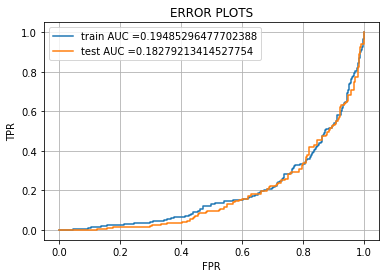

In [ ]:
# testing roc auc curve on best parameters

# best smoothing is 0657933224657568  

best_alpha = gs_NB.best_params_['var_smoothing']
m_nb = GaussianNB(var_smoothing= best_alpha)
m_nb.fit(DataTrain_transformed, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = m_nb.predict_proba(DataTrain_transformed)[:,1]    
y_test_pred = m_nb.predict_proba(DataTest_transformed)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred,pos_label='bad')
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred,pos_label='bad')

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

##1-d Model Evaluation

In [ ]:
# Validating on Test data
y_pred = m_nb.predict(DataTest_transformed)
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 480 points : 124


In [ ]:
128/480

0.26666666666666666

In [ ]:
# Model Evaluation 
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])  

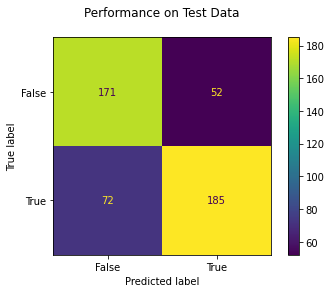

In [ ]:
cm_display.plot()
plt.title('Performance on Test Data\n')
plt.show() 

In [ ]:
accuracy = metrics.accuracy_score(y_test, y_pred)
Precision = metrics.precision_score(y_test, y_pred, pos_label='bad')
recall = metrics.recall_score(y_test, y_pred, pos_label='bad')
F1_score = metrics.f1_score(y_test, y_pred, pos_label='bad')

In [ ]:
print('Model Evaluation Parameters - \n Accuracy: {} \n Precision: {} \n recall: {} \n F1_score: {}'.format(accuracy,Precision,recall,F1_score))

Model Evaluation Parameters - 
 Accuracy: 0.7416666666666667 
 Precision: 0.7037037037037037 
 recall: 0.7668161434977578 
 F1_score: 0.7339055793991416


# 2- Implementing Logistic regression

## 2-a Defining Classifer with Grid Search CV

Logistic Regressor assumes that features are independent and lineraly seprable which is most unlikely in real world.

In [ ]:
# Cross validation
cv_method = RepeatedStratifiedKFold(n_splits=10, 
                                    n_repeats=3, 
                                    random_state=79)

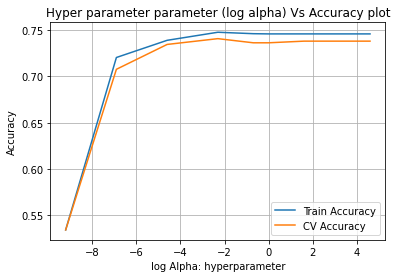

In [ ]:
# a. Train Logistic regression on data(X,Y) that we have created in the above cell
model = LogisticRegression(random_state=0,penalty='l2')
hyper_para= dict(C= [0.0001,0.001,0.01,0.1,0.5,1.0,5.0,10,15,20,30,40,50,60,80,100])
clf = GridSearchCV(model,hyper_para,cv=5,return_train_score=True,n_jobs=-1,scoring='accuracy')
clf.fit(X_train,y_train)
#b. Find the best hyper prameter alpha with hyper parameter tuning using k-fold cross validation (grid search CV or random search CV make sure you choose the alpha in log space)
results = pd.DataFrame.from_dict(clf.cv_results_)

train_acc= results['mean_train_score']
train_acc_std= results['std_train_score']
cv_acc = results['mean_test_score']
cv_acc_std= results['std_test_score']
K = results['params']
log_k =map(lambda x: math.log(x['C']), K)
log_k = list(log_k)
plt.plot(log_k, train_acc, label='Train Accuracy')
plt.plot(log_k, cv_acc, label='CV Accuracy')
plt.legend()
plt.xlabel("log Alpha: hyperparameter")
plt.ylabel("Accuracy")
plt.title("Hyper parameter parameter (log alpha) Vs Accuracy plot")
plt.grid()
plt.show()

In [ ]:
print("BEST ALPHA: ",clf.best_params_['C']," BEST SCORE: ",clf.best_score_)

BEST ALPHA:  0.1  BEST SCORE:  0.7408512171684818


In [ ]:
#c. Creat a new Logistic regression with the best alpha (search for how to get the best hyper parameter value), name the best model as 'best_model'
best_alpha1= clf.best_params_['C']
best_model= LogisticRegression(random_state=7,penalty='l2',C=best_alpha1)

<h3>3. Getting the weights with the original data
    

In [ ]:
#a. train the 'best_model' with X, Y
best_model.fit(X_train,y_train)

LogisticRegression(C=0.1, random_state=7)

In [ ]:
#b. Check the accuracy of the model 'best_model_accuracy'
y_predict = best_model.predict(X_test)
best_model_accuracy= best_model.score(X_test,y_test)
print("Best_model_accuracy: ",best_model_accuracy)

Best_model_accuracy:  0.7395833333333334


In [ ]:
#c. Get the weights W using best_model.coef_

W= best_model.coef_
print("Weights: ",W)

Weights:  [[ 0.18766124 -0.43686471 -0.04800093  0.15343282 -0.2119195   0.21193398
  -0.52945893 -0.21245077 -0.06030007  0.50632567  0.73587594]]


## Type 2 Error v/s Type 1 Error

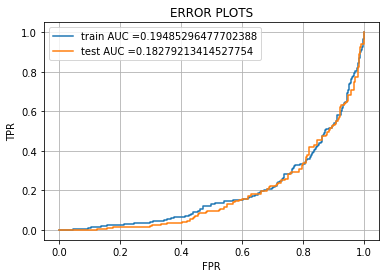

In [ ]:
# testing roc auc curve on best parameters

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = best_model.predict_proba(X_train)[:,1]    
y_test_pred = best_model.predict_proba(X_test)[:,1]

train_fpr1, train_tpr1, tr_thresholds = roc_curve(y_train, y_train_pred,pos_label='bad')
test_fpr1, test_tpr1, te_thresholds = roc_curve(y_test, y_test_pred,pos_label='bad')

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

##1-d Model Evaluation

In [ ]:
# Validating on Test data
y_pred = best_model.predict(X_test)
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 480 points : 125


In [ ]:
119/480

0.24791666666666667

In [ ]:
# Model Evaluation 
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])  

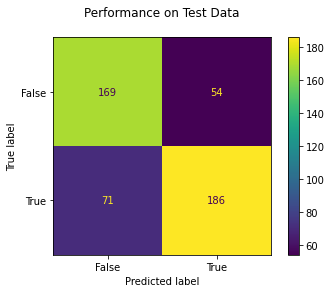

In [ ]:
cm_display.plot()
plt.title('Performance on Test Data\n')
plt.show() 

In [ ]:
accuracy1 = metrics.accuracy_score(y_test, y_pred)
Precision = metrics.precision_score(y_test, y_pred, pos_label='bad')
recall = metrics.recall_score(y_test, y_pred, pos_label='bad')
F1_score1 = metrics.f1_score(y_test, y_pred, pos_label='bad')

In [ ]:
print('Model Evaluation Parameters - \n Accuracy: {} \n Precision: {} \n recall: {} \n F1_score: {}'.format(accuracy,Precision,recall,F1_score))

Model Evaluation Parameters - 
 Accuracy: 0.7416666666666667 
 Precision: 0.7041666666666667 
 recall: 0.757847533632287 
 F1_score: 0.7339055793991416


# Summary- Model Comparision

In [ ]:
# reference: https://www.kaggle.com/nikhilparmar9/naive-bayes-donorschoose-dataset
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Model", "Hyperparameter: Smoothing or C", "Train AUC", "Test AUC","Train Accuracy", "Test Accuracy","Test F1"]

auc_set1_train=auc(train_fpr, train_tpr)
auc_set1_test=auc(test_fpr, test_tpr)
acc_Train_set1 = metrics.accuracy_score(y_train, m_nb.predict(DataTrain_transformed))
acc_Test_set1 = accuracy
f1_set1 = F1_score

auc_set2_train=auc(train_fpr1, train_tpr1)
auc_set2_test=auc(test_fpr1, test_tpr1)
acc_Train_set2 = metrics.accuracy_score(y_train, best_model.predict(X_train))
acc_Test_set2 = accuracy1
f1_set2 = F1_score1

x.add_row(["Gaussian Naive Bayes", round(best_alpha,5), round(auc_set1_train,2),round(auc_set1_test,2),round(acc_Train_set1,2),round(acc_Test_set1,2),round(f1_set1,2)])
x.add_row(["Logistic Regression", best_alpha1, round(auc_set2_train,2),round(auc_set2_test,2),round(acc_Train_set2,2),round(acc_Test_set2,2),round(f1_set2,2)])

print(x)

+----------------------+--------------------------------+-----------+----------+----------------+---------------+---------+
|        Model         | Hyperparameter: Smoothing or C | Train AUC | Test AUC | Train Accuracy | Test Accuracy | Test F1 |
+----------------------+--------------------------------+-----------+----------+----------------+---------------+---------+
| Gaussian Naive Bayes |            0.00658             |    0.19   |   0.18   |      0.74      |      0.74     |   0.73  |
| Logistic Regression  |              0.1               |    0.18   |   0.17   |      0.75      |      0.74     |   0.73  |
+----------------------+--------------------------------+-----------+----------+----------------+---------------+---------+
